In [16]:
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
## http://data.bls.gov/pdq/SurveyOutputServlet 
cpi_excel = open('SeriesReport.xlsx','r')
cpidf = pd.read_excel(cpi_excel,header=9).set_index('Year')
cpi = cpidf.drop({'HALF1','HALF2'},axis=1)

In [228]:
len(pd.read_csv('3700_nodupes.csv'))#.keys()

3784

In [180]:
oscars.corr()

,YRRank*,Noms,Wins,Year
YRRank*,1.000000,-0.349992,-0.242708,0.280993
Noms,-0.349992,1.000000,0.713882,-0.053645
Wins,-0.242708,0.713882,1.000000,-0.056076
Year,0.280993,-0.053645,-0.056076,1.000000


In [190]:
with open("oscars.pkl", 'r') as picklefile: 
    oscars = pickle.load(picklefile)
with open("processedMojo.pkl", 'r') as picklefile: 
    processed_mojo = pickle.load(picklefile)

In [227]:
oscars.columns=["YrRank", "Title", "Studio", "Box_Office_Gross", "Noms", "Wins","Year"]


,YrRank,Title,Studio,Box_Office_Gross,Noms,Wins,Year
0,11,Ordinary People,Par.,"$54,766,923",7,4,1980
1,33,Tess,Col.,"$20,093,330",6,3,1980
2,27,Raging Bull,MGM,"$23,334,953",8,2,1980
3,32,Fame (1980),MGM,"$21,202,829",6,2,1980
4,86,Melvin and Howard,Uni.,"$4,309,490",3,2,1980


In [225]:
processed_mojo.head()

,Gross_no_Theaters,Opening,Opening_no_Theaters,Rank,Studio,Title,Total_Gross,Year,Close,Open
1,3876,114844116,3615,1,Sony,Spider-Man,403706375,2002,2002-05-03,2002-05-03
2,3622,62007528,3622,2,NL,The Lord of the Rings: The Two Towers,339789881,2002,2002-12-18,2002-12-18
3,3161,80027814,3161,3,Fox,Star Wars: Episode II - Attack of the Clones,302191252,2002,2002-05-16,2002-05-16
4,3682,88357488,3682,4,WB,Harry Potter and the Chamber of Secrets,261988482,2002,2002-11-15,2002-11-15
5,2016,597362,108,5,IFC,My Big Fat Greek Wedding,241438208,2002,2002-04-19,2002-04-19


In [156]:
### moving averages of gross
grossTimeSeries = pd.Series(data=processed_mojo.Total_Gross.values, index=processed_mojo.Open)
OpenTimeSeries = pd.Series(data=processed_mojo.Opening.values, index=processed_mojo.Open)


vvv = processed_mojo.copy()
# processed_mojo.resample('M',)
# OpenTimeSeries

In [187]:
processed_mojo["Duration"] = processed_mojo.Close - processed_mojo.Open

In [206]:
d = {'Studio': processed_mojo.Studio, 'Date': processed_mojo.Open, 'Open_Money': processed_mojo.Opening, 'Title': processed_mojo.Title}
df = pd.DataFrame(data=d)
df.head()
# ranks = pd.DataFrame(data=[processed_mojo.Studio, processed_mojo.Open, processed_mojo.Opening])

,Date,Open_Money,Studio,Title
1,2002-05-03,114844116,Sony,Spider-Man
2,2002-12-18,62007528,NL,The Lord of the Rings: The Two Towers
3,2002-05-16,80027814,Fox,Star Wars: Episode II - Attack of the Clones
4,2002-11-15,88357488,WB,Harry Potter and the Chamber of Secrets
5,2002-04-19,597362,IFC,My Big Fat Greek Wedding


In [231]:
self_merge = pd.merge(df,df,on="Studio")
self_merge.head(100)
self_merge = self_merge[self_merge.Date_x > self_merge.Date_y]
self_merge
avged = self_merge.groupby(by=['Studio', 'Title_y']).mean()

In [232]:
avged.reset_index()

,Studio,Title_y,Open_Money_x,Open_Money_y
0,3D,Dolphins and Whales: Tribes of the Ocean 3D,NaN,41695
1,3D,Sea Rex 3D: Journey to a Prehistoric World,NaN,NaN
2,4Sea,Romero,NaN,10189
3,5&2,"Me & You, Us, Forever",137235.750000,58662
4,5&2,October Baby,138677.000000,102096
5,5&2,The Secrets of Jonathan Sperry,96847.666667,258400
6,5&2,Time Changer,103920.000000,300103
7,5&2,Unidentified,121521.000000,15915
8,5&2,What If...,120386.500000,49770
9,518,Inland Empire,7402.000000,27508


In [157]:
vvv

,Gross_no_Theaters,Opening,Opening_no_Theaters,Rank,Studio,Title,Total_Gross,Year,Close,Open
1,3876,114844116,3615,1,Sony,Spider-Man,403706375,2002,2002-05-03,2002-05-03
2,3622,62007528,3622,2,NL,The Lord of the Rings: The Two Towers,339789881,2002,2002-12-18,2002-12-18
3,3161,80027814,3161,3,Fox,Star Wars: Episode II - Attack of the Clones,302191252,2002,2002-05-16,2002-05-16
4,3682,88357488,3682,4,WB,Harry Potter and the Chamber of Secrets,261988482,2002,2002-11-15,2002-11-15
5,2016,597362,108,5,IFC,My Big Fat Greek Wedding,241438208,2002,2002-04-19,2002-04-19
6,3453,60117080,3264,6,BV,Signs,227966634,2002,2002-08-02,2002-08-02
7,3613,73071188,3613,7,NL,Austin Powers in Goldmember,213307889,2002,2002-07-26,2002-07-26
8,3641,52148751,3557,8,Sony,Men in Black II,190418803,2002,2002-07-03,2002-07-03
9,3345,46312454,3316,9,Fox,Ice Age,176387405,2002,2002-03-15,2002-03-15
10,2701,2074929,77,10,Mira.,Chicago,170687518,2002,2002-12-27,2002-12-27


In [158]:
vvv['month'] = vvv['Open'].apply(lambda x: str(x.month))

In [159]:
vvv = vvv.set_index('Open')


In [161]:
vvv.head()

,Gross_no_Theaters,Opening,Opening_no_Theaters,Rank,Studio,Title,Total_Gross,Year,Close,month
Open,,,,,,,,,,
2002-05-03,3876,114844116,3615,1,Sony,Spider-Man,403706375,2002,2002-05-03,5
2002-12-18,3622,62007528,3622,2,NL,The Lord of the Rings: The Two Towers,339789881,2002,2002-12-18,12
2002-05-16,3161,80027814,3161,3,Fox,Star Wars: Episode II - Attack of the Clones,302191252,2002,2002-05-16,5
2002-11-15,3682,88357488,3682,4,WB,Harry Potter and the Chamber of Secrets,261988482,2002,2002-11-15,11
2002-04-19,2016,597362,108,5,IFC,My Big Fat Greek Wedding,241438208,2002,2002-04-19,4


In [175]:
vresample = vvv.resample('7D',how='mean').reset_index()

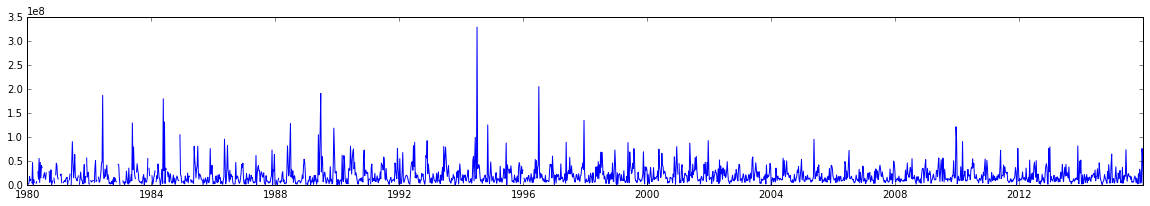

In [176]:
plt.plot(vresample.Open,vresample.Total_Gross)

In [109]:
vvv_open = pd.Series(data=vvv.Opening.values, index=vvv.month)


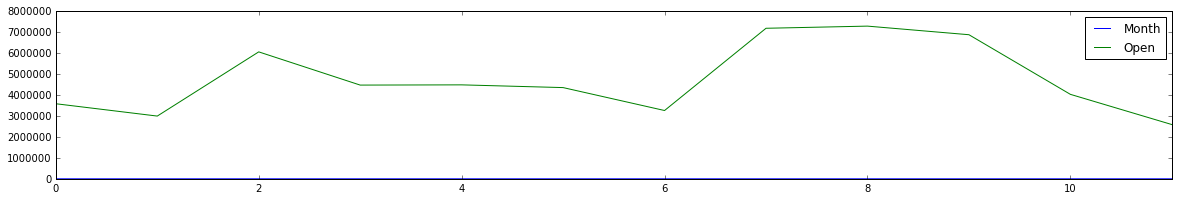

In [136]:
import numpy as np
hist_try = pd.DataFrame(vvv_open).reset_index()
hist_try.columns = ["Month","Open"]
hist_try = hist_try.groupby('Month').aggregate(np.mean).reset_index()
hist_try.Month = pd.to_numeric(hist_try.Month, errors='ignore')
# type(hist_try.Month.values[0])
hist_try.plot()

In [91]:
tester = OpenTimeSeries.resample('M',how='mean')
tested = grossTimeSeries.resample('M',how='mean')

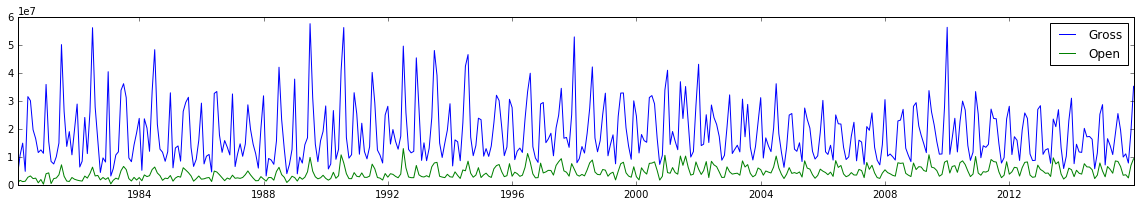

In [92]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3

plt.plot(tested,label='Gross')

plt.plot(tester,label='Open')
plt.legend()

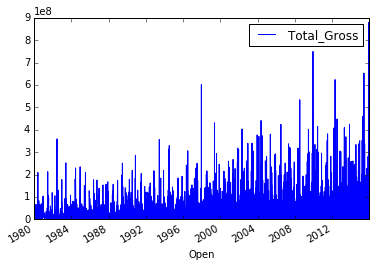

In [23]:
processed_mojo.plot(x='Open',y='Total_Gross')
# plot averages over this, get equation of the line
# plot budget as well. 

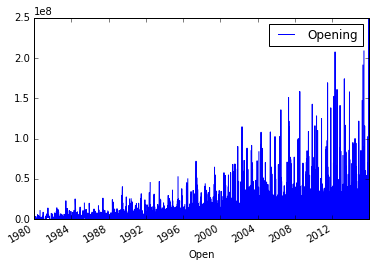

In [20]:
processed_mojo.plot(x='Open',y='Opening')

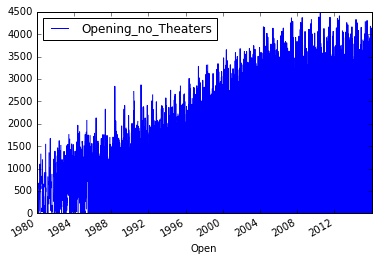

In [21]:
processed_mojo.plot(x='Open',y='Opening_no_Theaters')

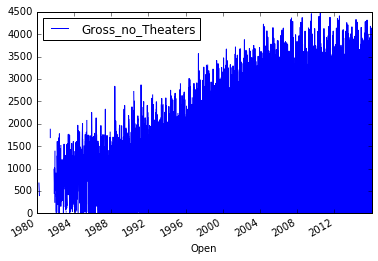

In [22]:
processed_mojo.plot(x='Open',y='Gross_no_Theaters')

In [29]:
processed_mojo.resample('M',how='mean')



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [25]:
## http://www.bls.gov/cpi/cpimathfs.pdf
processed_mojo

In [26]:
processed_mojo.corr()

,Gross_no_Theaters,Opening,Opening_no_Theaters,Total_Gross,Year
Gross_no_Theaters,1.000000,0.711870,0.967296,0.706586,-0.076795
Opening,0.711870,1.000000,0.725978,0.890424,0.055142
Opening_no_Theaters,0.967296,0.725978,1.000000,0.658243,-0.050572
Total_Gross,0.706586,0.890424,0.658243,1.000000,-0.018419
Year,-0.076795,0.055142,-0.050572,-0.018419,1.000000
